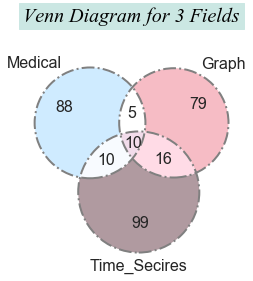

In [1061]:
vd3=venn3([set(medical),set(graph),set(time_seres)],set_labels=('Medical', 'Graph','Time_Secires'),
          set_colors=('#c4e6ff', '#F4ACB7','#9D8189'), alpha = 0.8)
venn3_circles([set(medical), set(graph),set(time_seres)], linestyle='-.', linewidth=2, color='grey')
for text in vd3.set_labels:
    text.set_fontsize(16);
for text in vd3.subset_labels:
    text.set_fontsize(16)
plt.title('Venn Diagram for 3 Fields',fontname='Times New Roman',fontweight='bold',fontsize=20,
 pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.show()

### Figure 1. Figure shows the overlapped vocabulary for machine learning in the field of medical studies, time series studies and graph studies. The over lapped words are {'deep', 'computer_vision', 'speech', 'learning', 'paper', 'networks', 'models', 'vision', 'audio', 'computer'} .

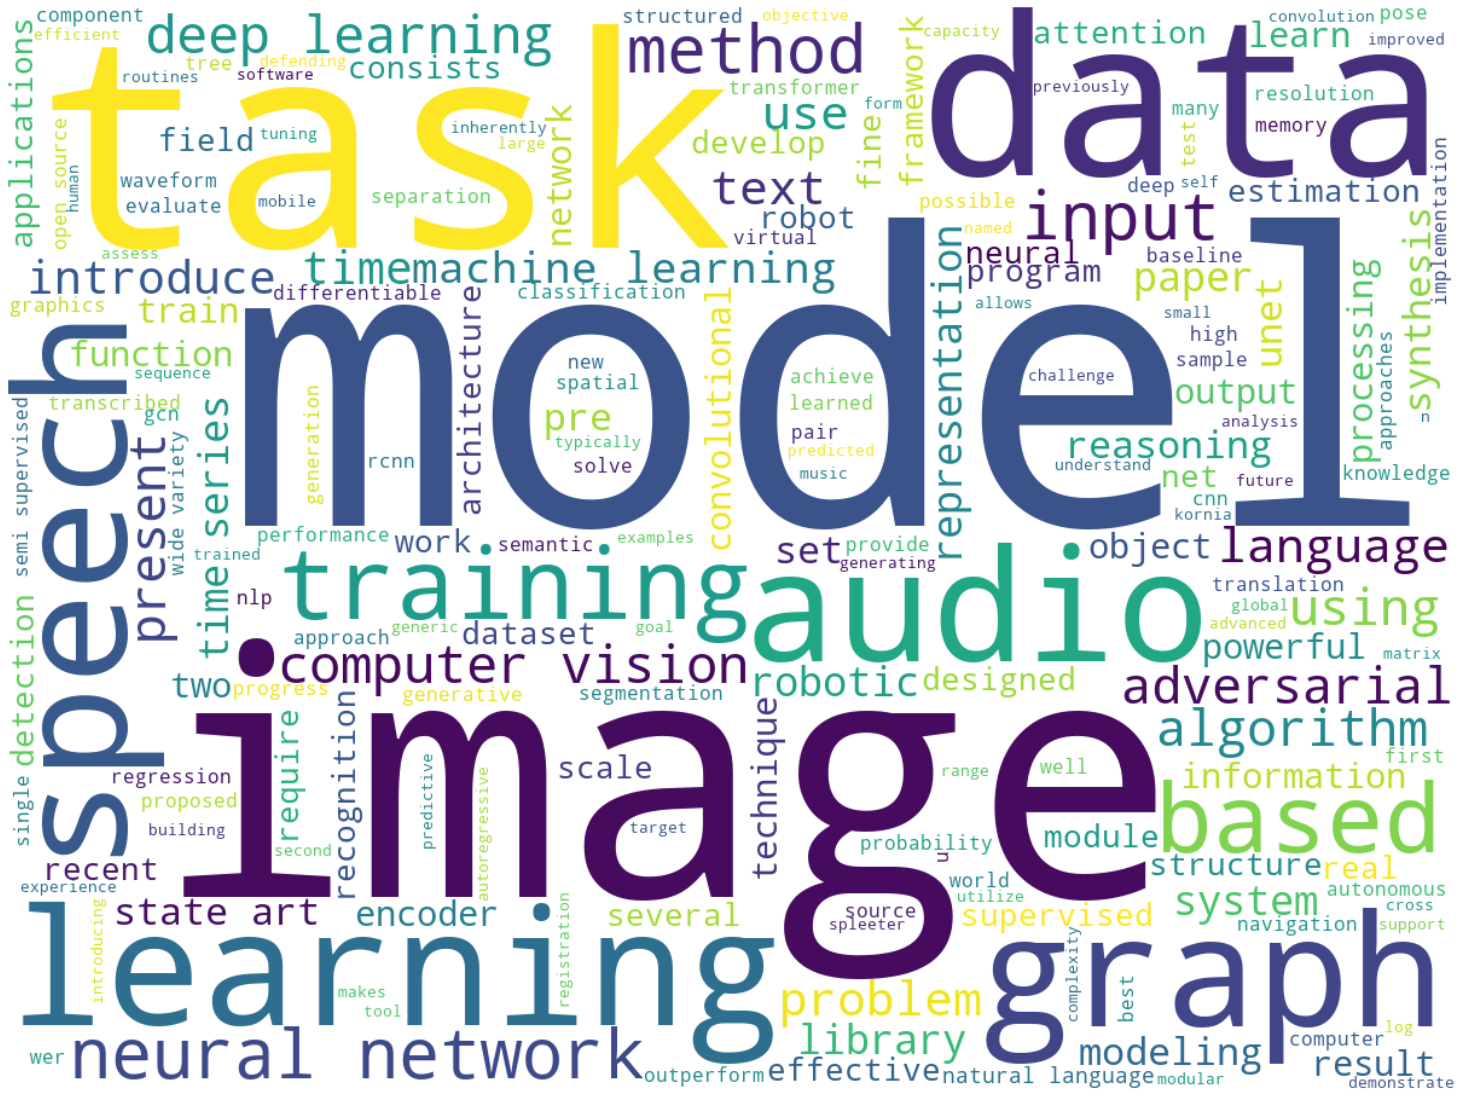

In [1059]:
norm_text = ' '.join(sumsAll)

wordcloud = WordCloud(background_color = 'white',
                      max_words = 200,
                      width = 1200,
                      height = 900).generate(norm_text)

fig, ax = plt.subplots(figsize = (30, 20))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Figure 2. Figure shows that, in machine learning context,  the frequency of words from a range of studies including medical, speech, robots and so on. 

In [242]:
import nltk
nltk.download()
from nltk.corpus import wordnet
from nltk.corpus import wordnet
import collections
import requests
from bs4 import BeautifulSoup
#from requests_html import HTMLSession
from PyDictionary import PyDictionary

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words("english")
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [713]:
from contextlib import suppress

In [244]:
import pandas as pd
from itertools import chain
import numpy as np
import re
import string
from collections import Counter
from os import path
from PIL import Image
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Scraped data from a webpage

In [245]:
def Scraped_data(subject):
    str1='https://paperswithcode.com/search?q_meta=&q_type=&q='
    str2=subject
    url=str1+str2
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    papers = soup.find_all('div', class_="col-lg-9 item-content")
    Titles=[]
    Dates=[]
    Abstracts=[]
    for paper in papers:
        # Each job_elem is a new BeautifulSoup object.
        # You can use the same methods on it as you did before.
        Title = paper.find('a').text.strip()
        Titles.append(Title)
        Date = paper.find('span',class_="author-name-text")
        if Date:
            Date=Date.text.strip()
            Dates.append(Date)
        else:
            Dates.append(np.nan)
        Abstract = paper.find('p',class_="item-strip-abstract").text.strip()
        if Abstract:
            Abstract = paper.find('p',class_="item-strip-abstract").text.strip()
            Abstracts.append(Abstract)
        else:
            Abstracts.append(np.nan)
    d = {'Titles':Titles, 'Dates': Dates,'Abstracts':Abstracts}
    df = pd.DataFrame(data=d)
    return df



In [246]:
subjects=['medical','art','computer+vision','graph','speech','time+series','audio','robots','reasoning','adversarial']

In [247]:
medical=Scraped_data(subjects[3])
medical

,Titles,Dates,Abstracts
0,DDGK: Learning Graph Representations for Deep ...,21 Apr 2019,"Second, for each pair of graphs, we train a cr..."
1,Fast Linear Model for Knowledge Graph Embeddings,30 Oct 2017,This paper shows that a simple baseline based ...
2,Scalable Deep Generative Modeling for Sparse G...,NaN,"Based on this, we develop a novel autoregressi..."
3,Diffusion Improves Graph Learning,NaN,"In this work, we remove the restriction of usi..."
4,Learning Graph Structure With A Finite-State A...,NaN,"In practice, edges are used both to represent ..."
5,"Deep Graph Library: A Graph-Centric, Highly-Pe...",3 Sep 2019,Advancing research in the emerging field of de...
6,Principal Neighbourhood Aggregation for Graph ...,NaN,Graph Neural Networks (GNNs) have been shown t...
7,Learning to Execute Programs with Instruction ...,NaN,"More practically, we evaluate these models on ..."
8,Fast Graph Representation Learning with PyTorc...,6 Mar 2019,"We introduce PyTorch Geometric, a library for ..."
9,Cluster-GCN: An Efficient Algorithm for Traini...,NaN,"Furthermore, Cluster-GCN allows us to train mu..."


# Data cleaning, remove synonyms

In [590]:
#replace words
def text_to_words(text,sw):
    translator = re.compile('[%s]' % re.escape(string.punctuation))
    text =translator.sub(' ', text)
    text = text.lower()
    words = word_tokenize(text)
    #words = text.split()
    
    vocab=[]
    for word in words:
        if word.isalpha() and not word in sw:
            vocab.append(word)
    return vocab

In [691]:
sw.append('end')
sw.append('lot')
sw.append('without')
sw.append('due')
sw.append('uses')
sw.append('another')
sw.append('show')
sw.append('used')
sw.append('either')
sw.append('different')
sw.append('often')
sw.append('contain')
sw.append('mix')
sw.append('including')
sw.append('e')
sw.append('g')

In [692]:
# get the word list for multiple papers from different fields
sub=[]
wordcloud=list()
for s in subjects:
    As=Scraped_data(s).Abstracts
    sub.append(s)
    SubWords=list()
    for A in As:
        
        #if A:
        word=text_to_words(A,sw)
        SubWords.append(word)
        #else:
            #SubWords.append('')
        #SubWords = list(chain.from_iterable(SubWords))
    wordcloud.append(SubWords)

In [693]:
df=np.transpose(pd.DataFrame(wordcloud,sub))
df

,medical,art,computer+vision,graph,speech,time+series,audio,robots,reasoning,adversarial
0,"[generative, adversarial, networks, gained, at...","[transformer, architectures, facilitated, buil...","[convolutional, networks, core, state, art, co...","[second, pair, graphs, train, cross, graph, at...","[deep, learning, approach, recognize, english,...","[multi, horizon, forecasting, problems, comple...","[small, number, weights, sparse, wavernn, make...","[focus, project, autonomous, navigation, goal,...","[commonsense, reasoning, long, standing, chall...","[paper, develop, improved, techniques, defendi..."
1,"[niftynet, provides, modular, deep, learning, ...","[present, release, new, tool, music, source, s...","[humans, read, write, hundreds, billions, mess...","[paper, shows, simple, baseline, based, bag, w...","[first, time, learning, powerful, representati...","[observe, method, consistently, outperforms, b...","[efficient, audio, synthesis, inherently, diff...","[present, framework, data, driven, robotics, m...","[natural, language, questions, inherently, com...","[adversarial, examples, malicious, inputs, des..."
2,"[contrast, approach, building, recent, learnin...","[present, flair, nlp, framework, designed, fac...","[work, presents, kornia, open, source, compute...","[based, develop, novel, autoregressive, model,...","[present, state, art, speech, recognition, sys...","[problem, especially, hard, solve, time, serie...","[introduce, cola, self, supervised, pre, train...","[develop, software, stack, allows, smartphones...","[demonstrate, framework, pose, estimation, pro...","[form, adversarial, training, converges, degen..."
3,"[implementation, kinds, unet, models, image, s...","[text, discusses, several, popular, explanator...","[work, presents, kornia, open, source, compute...","[work, remove, restriction, using, direct, nei...","[text, speech, synthesis, system, typically, c...","[future, stock, prices, predicted, nonlinear, ...","[paper, introduces, wavenet, deep, neural, net...","[paper, introduces, pyrobot, open, source, rob...","[analogical, reasoning, effective, capturing, ...","[ask, whether, neural, networks, learn, use, s..."
4,"[define, registration, parametric, function, o...","[since, bert, neglects, dependency, among, pre...","[present, gluoncv, gluonnlp, deep, learning, t...","[practice, edges, represent, intrinsic, struct...","[clone, voice, seconds, generate, arbitrary, s...","[present, sktime, new, scikit, learn, compatib...","[recent, advances, birdsong, detection, classi...","[behavior, tree, bt, way, structure, switching...","[scene, text, image, contains, two, levels, co...","[adversarial, training, provides, means, regul..."
5,"[performance, deep, learning, significantly, a...","[first, time, learning, powerful, representati...","[despite, significant, progress, deep, learnin...","[advancing, research, emerging, field, deep, g...","[speech, synthesis, important, practical, gene...","[combination, advanced, training, techniques, ...","[within, music, information, retrieval, mir, p...","[reinforcement, learning, rl, enables, robots,...","[paper, develop, neural, assistant, single, ne...","[investigate, conditional, adversarial, networ..."
6,"[present, dltk, toolkit, providing, baseline, ...","[language, models, become, key, step, achieve,...","[computer, graphics, generate, synthetic, imag...","[graph, neural, networks, gnns, shown, effecti...","[librispeech, achieve, wer, test, use, languag...","[defending, machine, learning, models, involve...","[audio, processing, models, based, deep, neura...","[mainstream, computer, vision, machine, learni...","[probability, trees, one, simplest, models, ca...","[collecting, well, annotated, image, datasets,..."
7,"[infeasible, train, cnn, models, directly, hig...","[lxmert, build, large, scale, transformer, mod...","[since, output, event, cameras, fundamentally,...","[practically, evaluate, models, task, learning...","[experiments, wsj, reduce, wer, strong, charac

In [694]:
sums=[]
for s in range(len(subjects)):
    a=list([j for i in df.iloc[s] for j in i])
    sums.append(a)
    #sum.append([a,subjects[s]])

In [873]:
sums=pd.Series(sums,index=subjects)
sums.medical            

['generative',
 'adversarial',
 'networks',
 'gained',
 'attention',
 'computer',
 'vision',
 'community',
 'capability',
 'data',
 'generation',
 'explicitly',
 'modelling',
 'probability',
 'density',
 'function',
 'transformer',
 'architectures',
 'facilitated',
 'building',
 'higher',
 'capacity',
 'models',
 'pretraining',
 'made',
 'possible',
 'effectively',
 'utilize',
 'capacity',
 'wide',
 'variety',
 'tasks',
 'convolutional',
 'networks',
 'core',
 'state',
 'art',
 'computer',
 'vision',
 'solutions',
 'wide',
 'variety',
 'tasks',
 'second',
 'pair',
 'graphs',
 'train',
 'cross',
 'graph',
 'attention',
 'network',
 'node',
 'representations',
 'anchor',
 'graph',
 'reconstruct',
 'graph',
 'deep',
 'learning',
 'approach',
 'recognize',
 'english',
 'mandarin',
 'chinese',
 'speech',
 'two',
 'vastly',
 'languages',
 'multi',
 'horizon',
 'forecasting',
 'problems',
 'complex',
 'inputs',
 'static',
 'time',
 'invariant',
 'covariates',
 'known',
 'future',
 'inputs',
 

In [883]:
sumsAll=[]
for s in subjects:
    #a=list([j for i in sums.loc[s] for j in i])
    sumsAll+=sums.loc[s]
    #sum.append([a,subjects[s]])
sumsAll

['generative',
 'adversarial',
 'networks',
 'gained',
 'attention',
 'computer',
 'vision',
 'community',
 'capability',
 'data',
 'generation',
 'explicitly',
 'modelling',
 'probability',
 'density',
 'function',
 'transformer',
 'architectures',
 'facilitated',
 'building',
 'higher',
 'capacity',
 'models',
 'pretraining',
 'made',
 'possible',
 'effectively',
 'utilize',
 'capacity',
 'wide',
 'variety',
 'tasks',
 'convolutional',
 'networks',
 'core',
 'state',
 'art',
 'computer',
 'vision',
 'solutions',
 'wide',
 'variety',
 'tasks',
 'second',
 'pair',
 'graphs',
 'train',
 'cross',
 'graph',
 'attention',
 'network',
 'node',
 'representations',
 'anchor',
 'graph',
 'reconstruct',
 'graph',
 'deep',
 'learning',
 'approach',
 'recognize',
 'english',
 'mandarin',
 'chinese',
 'speech',
 'two',
 'vastly',
 'languages',
 'multi',
 'horizon',
 'forecasting',
 'problems',
 'complex',
 'inputs',
 'static',
 'time',
 'invariant',
 'covariates',
 'known',
 'future',
 'inputs',
 

### Frequency of word for a specific dataset

In [896]:
def find_bigrams(words,th):
  
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    
    freq_threshold = th
    bigrams = []

    bigram_finder = BigramCollocationFinder.from_words(words)
    bigram_finder.apply_freq_filter(freq_threshold)
    bigrams.append([x[0] for x in bigram_finder.score_ngrams(bigram_measures.pmi)])
    return bigrams

def remove_bigrams(words,bigrams):
# newWordslength=len(words)-len(bigrams[0])
    newWords=[]
    for w in range(len(words)-1):
        for i in range(len(bigrams[0])):
            if words[w]==bigrams[0][i][0] and words[w+1]==bigrams[0][i][1]:
                newword=[]
                ww=[words[w],words[w+1]]
                newword= "_".join(ww)
                newWords.append(newword)
            elif w> 1 and words[w-1]==bigrams[0][i][0] and words[w]==bigrams[0][i][1]:
                pass
                #print('bigrams identified:{}'.format(newword))
            else:
                newWords.append(words[w])
    return newWords

In [890]:
find_bigrams(sumsAll,3)

[[('wide', 'variety'),
  ('state', 'art'),
  ('semi', 'supervised'),
  ('open', 'source'),
  ('natural', 'language'),
  ('time', 'series'),
  ('computer', 'vision'),
  ('speech', 'recognition'),
  ('neural', 'network'),
  ('language', 'processing'),
  ('real', 'time'),
  ('pre', 'training'),
  ('convolutional', 'neural'),
  ('neural', 'networks'),
  ('machine', 'learning'),
  ('deep', 'learning'),
  ('adversarial', 'training'),
  ('language', 'model'),
  ('learning', 'algorithms'),
  ('supervised', 'learning'),
  ('learning', 'based'),
  ('learning', 'models')]]

In [843]:
#not used!
def Combine_synonyms_count(Sdf_count):
    dict = {}
    Sets = set()
    rep1=[]
    rep2=[]
    Sdf_count.freq.astype(int)
    for wordToCehck in Sdf_count.word:
        if wordToCehck not in Sets:
            synonyms=[]
            for syn in wordnet.synsets(wordToCehck):
                for l in syn.lemmas():
                    synonyms.append(l.name())
            ss=set(synonyms)            
            Sets.update(ss)
            for syns in ss:
                dict[syns]=wordToCehck
                            
        else:
            rootWord=dict.get(wordToCehck)
            synf=int(Sdf_count.freq[Sdf_count.word==wordToCehck])
            root=int(Sdf_count.freq[Sdf_count.word==rootWord])
            Sdf_count.freq[Sdf_count.word==rootWord]= (root + synf) #delete the word with lower frequency
            rep1.append(wordToCehck)
            rep2.append(rootWord)
            # 
    for r in rep1:
        Sdf_count=Sdf_count[Sdf_count.word!=r]
        
    return Sdf_count,rep1,rep2;


In [819]:
type(bigramCorrectlist)

list

In [830]:
def Combine_synonyms(bigramCorrectlist):
    dict = {}
    allSets = set()
    rep1=[]
    rep2=[]
    
    for wordToCehck in bigramCorrectlist:
        if wordToCehck not in allSets:
            synonyms=[]
            for syn in wordnet.synsets(wordToCehck):
                for l in syn.lemmas():
                    synonyms.append(l.name())
            ss=set(synonyms)            
            allSets.update(ss)
            for syns in ss:
                dict[syns]=wordToCehck
        else:
            repeatword=dict[wordToCehck]
            bigramCorrectlist = [repeatword if i== wordToCehck else i for i in bigramCorrectlist]
            rep1.append(repeatword)
            rep2.append(wordToCehck)
    rep1=set(rep1)
    rep2=set(rep2)

        
    return bigramCorrectlist,rep1,rep2;

In [831]:
SynBigramList,rep1,rep2=Combine_synonyms(bigramCorrectlist)
print('The set {} is repetitive to set {}'.format(rep1,rep2))

The set {'potential', 'methods', 'wide', 'best', 'recognition', 'probability', 'gap', 'empirical', 'sets', 'cluster', 'ranking', 'previously', 'goal', 'training', 'limited', 'surgical', 'network', 'fixed', 'neural', 'self', 'test', 'compose', 'detection', 'tracking', 'length', 'layer', 'invasive', 'algebra', 'unlabeled', 'map', 'visual', 'introducing', 'modeling', 'form', 'depth', 'achieve', 'complexity', 'classic', 'dependency', 'architecture', 'surgery', 'much', 'accuracy', 'audio', 'reference', 'data', 'deep', 'allows', 'output', 'language', 'order', 'input', 'art', 'overhead', 'space', 'context', 'semantic', 'nature', 'object', 'memory', 'illuminate', 'furthermore', 'mathematics', 'designed', 'translation', 'structured', 'leads', 'vision', 'crucial', 'representative', 'assess', 'robotic', 'strive', 'geometric', 'domain', 'using', 'construction', 'relate', 'image', 'calculus', 'covering', 'ability', 'representation', 'library', 'learning', 'minimally', 'knowledge', 'additional', 'ai

In [808]:
def Combine_same_root_words(Sdf):
    dict = {}
    for wordToCehck in Sdf.word:
        if len(word)>=5:
            root=wordToCehck[0:4]
            
            if root not in dict.keys():
                
                dict[root] = wordToCehck
            else:
                rootWord=dict[root]
                Sdf.freq[Sdf.word==rootWord]=int(Sdf.freq[Sdf.word==rootWord])+ int(Sdf.freq[Sdf.word==wordToCehck])
                Sdf=Sdf[Sdf.word!=wordToCehck] #delete the word with lower frequency
            
    
    return Sdf;



### Take a close look at Buzzword in machine learning in speech

In [832]:
subject='speech'

In [833]:
sums[subject]

['define',
 'registration',
 'parametric',
 'function',
 'optimize',
 'parameters',
 'given',
 'set',
 'images',
 'collection',
 'interest',
 'since',
 'bert',
 'neglects',
 'dependency',
 'among',
 'predicted',
 'tokens',
 'xlnet',
 'introduces',
 'permuted',
 'language',
 'modeling',
 'plm',
 'pre',
 'training',
 'address',
 'problem',
 'present',
 'gluoncv',
 'gluonnlp',
 'deep',
 'learning',
 'toolkits',
 'computer',
 'vision',
 'natural',
 'language',
 'processing',
 'based',
 'apache',
 'mxnet',
 'incubating',
 'practice',
 'edges',
 'represent',
 'intrinsic',
 'structure',
 'abstract',
 'syntax',
 'trees',
 'programs',
 'abstract',
 'relations',
 'aid',
 'reasoning',
 'downstream',
 'task',
 'results',
 'relevant',
 'program',
 'analyses',
 'clone',
 'voice',
 'seconds',
 'generate',
 'arbitrary',
 'speech',
 'real',
 'time',
 'present',
 'sktime',
 'new',
 'scikit',
 'learn',
 'compatible',
 'python',
 'library',
 'unified',
 'interface',
 'machine',
 'learning',
 'time',
 'ser

In [837]:
#get bigrarms
bigrams,bigramCorrectlist=find_bigrams(sums[subject])

bigrams identified:deep_learning
bigrams identified:computer_vision


In [838]:
#correct for synonyms
SynBigramList,rep1,rep2=Combine_synonyms(bigramCorrectlist)
print('The set {} is repetitive to set {}'.format(rep1,rep2))

The set {'fully', 'processing', 'define', 'way', 'problem', 'abstract', 'trees', 'interface', 'switching', 'text', 'agent', 'texture', 'training', 'programs', 'voice', 'recent', 'extend', 'based', 'compatible', 'detection', 'behavior', 'syntax', 'semi', 'visual', 'modeling', 'lack', 'parametric', 'practice', 'supervised', 'robot', 'dependency', 'real', 'birdsong', 'deep', 'language', 'given', 'intrinsic', 'semantic', 'information', 'autonomous', 'natural', 'structure', 'arbitrary', 'entity', 'vision', 'game', 'images', 'able', 'python', 'virtual', 'optimize', 'relations', 'introduces', 'interest', 'registration', 'library', 'learning', 'unified', 'function', 'downstream', 'two', 'task', 'aid', 'series', 'reasoning', 'represent', 'clone', 'time', 'relevant', 'computer', 'machine', 'collection', 'apache', 'classification', 'new', 'scene', 'address', 'contents'} is repetitive to set {'fully', 'processing', 'define', 'way', 'problem', 'abstract', 'interface', 'switching', 'text', 'agent', 

In [839]:
# Create counters
counts = collections.Counter(SynBigramList) #medical
counts.most_common(20)

[('learning', 19),
 ('define', 12),
 ('introduces', 12),
 ('training', 12),
 ('supervised', 12),
 ('given', 8),
 ('images', 8),
 ('language', 8),
 ('address', 8),
 ('structure', 8),
 ('abstract', 8),
 ('trees', 8),
 ('programs', 8),
 ('time', 8),
 ('way', 8),
 ('virtual', 8),
 ('adversarial', 8),
 ('algorithms', 8),
 ('computer', 7),
 ('registration', 4)]

In [848]:
#View the counts
Sdf = pd.DataFrame(list(counts.most_common()),columns = ['word','freq'])
Sdf.freq.astype(int)
Sdf=Sdf.sort_values(by='freq',ascending=False)
Sdf.head()

,word,freq
0,learning,19
2,introduces,12
3,training,12
4,supervised,12
1,define,12


In [846]:
# just for verification
SymbigramCorrectlist,rep1,rep2=Combine_synonyms_count(Sdf)
print(rep1,rep2)# check for one synaonyms
SymbigramCorrectlist

['task'] ['tasks']


C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,word,freq
0,learning,19
2,introduces,12
3,training,12
4,supervised,12
1,define,12
...,...,...
43,processing,4
110,deep,3
111,vision,3
112,deep_learning,1


In [ ]:

#counts = collections.Counter(bigramCorrectlist) 

#RootSymbigramCorrectlist=Combine_same_root_words(SymbigramCorrectlist)

In [916]:
#Get the count table for all subjects
def get_corrected_word_count(subject,sums,sumsAll):
    with suppress('SettingWithCopyWarning'):
        wholeVocabs=[]
        #subject=i
        
        bigrams=find_bigrams(sumsAll,3) #find bigrams
        bigramCorrectlist=remove_bigrams(sums[subject],bigrams) #correct bigrams
        
        SynBigramList,rep1,rep2=Combine_synonyms(bigramCorrectlist) #correct for synonyms

        
        counts = collections.Counter(SynBigramList) # Create counters

        Sdf = pd.DataFrame(list(counts.most_common()),columns = ['word','freq']) #change to dataframe
        Sdf.freq.astype(int)
        Sdf=Sdf.sort_values(by='freq',ascending=False)
        
        SymbigramCorrectlist,rep1,rep2=Combine_synonyms(Sdf) #get rid of synonyms

    return SynBigramList

In [917]:
get_corrected_word_count('speech',sums,sumsAll)

['define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'define',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'registration',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'parametric',
 'function',
 'function',
 'function',
 'function',
 '

### PLOT GRAPH

In [918]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

In [919]:
# medical : 0
# time series: 5

type(sum[1])
art=get_corrected_word_count('art',sums,sumsAll)
computer_vision=get_corrected_word_count('computer+vision',sums,sumsAll)
time_series=get_corrected_word_count('time+series',sums,sumsAll)
reasoning=get_corrected_word_count('reasoning',sums,sumsAll)
robots=get_corrected_word_count('robots',sums,sumsAll)
adversarial=get_corrected_word_count('adversarial',sums,sumsAll)
medical=get_corrected_word_count('medical',sums,sumsAll)
graph=get_corrected_word_count('graph',sums,sumsAll)
speech=get_corrected_word_count('speech',sums,sumsAll)
audio=get_corrected_word_count('audio',sums,sumsAll)
Aset=set(medical)
Bset=set(time_series)
Cset=set(graph)

print('Medical, Graph and Time series studies all looks in to {} .'.format(Aset.intersection(Bset, Cset)))

Medical, Graph and Time series studies all looks in to {'deep', 'computer_vision', 'speech', 'learning', 'paper', 'networks', 'models', 'vision', 'audio', 'computer'} .


### Venn diagrams

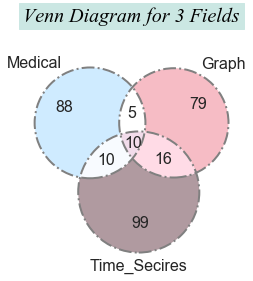

In [1057]:

vd3=venn3([set(medical),set(graph),set(time_seres)],set_labels=('Medical', 'Graph','Time_Secires'),
set_colors=('#c4e6ff', '#F4ACB7','#9D8189'), alpha = 0.8)
venn3_circles([set(medical), set(graph),set(time_seres)], linestyle='-.', linewidth=2, color='grey')
for text in vd3.set_labels:
    text.set_fontsize(16);
for text in vd3.subset_labels:
    text.set_fontsize(16)
plt.title('Venn Diagram for 3 Fields',fontname='Times New Roman',fontweight='bold',fontsize=20,
 pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.show()     

### Frequency graph

In [922]:
# Create counters
counts = collections.Counter(medical) #medical
Top_medical_skills=counts.most_common(20)

In [911]:
fdf = pd.DataFrame(counts.most_common(20),
                             columns=['words', 'count'])

fdf.head()

,words,count
0,graphs,88
1,networks,66
2,capability,66
3,tasks,66
4,time,64


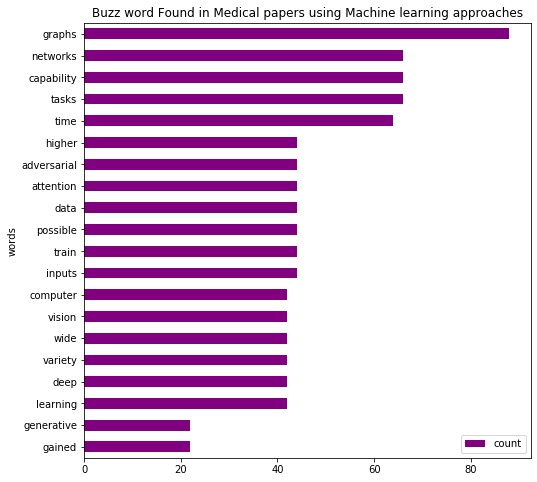

In [913]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
fdf.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Buzz word Found in Medical papers using Machine learning approaches")

plt.show()

In [1051]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


In [1053]:
?WordCloud


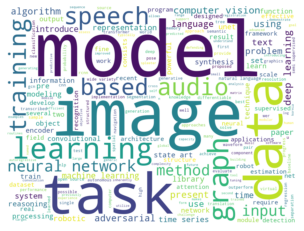

In [1056]:
norm_text = ' '.join(sumsAll)

wordcloud = WordCloud(background_color = 'white',
                      max_words = 200,
                      width = 1200,
                      height = 900).generate(norm_text)


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()